In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nengo
import nengo_spa as spa

In [2]:
dim = 32
vocab = spa.Vocabulary(dimensions=dim)

words = ['AA', 'BB', 'CC', 'DD']

for word in words:
    vocab.populate(word)

In [21]:
with spa.Network('AssociativeMemory', seed=0) as model_1:
    # create the AM module
    model_1.assoc_mem = spa.WTAAssocMem(threshold=0.3, input_vocab=vocab,
                                                 mapping={'AA': 'BB', 'BB': 'CC', 'CC': 'DD', 'DD': 'AA',
                                                          'BB': 'AA', 'CC': 'BB', 'DD': 'CC', 'AA': 'DD'})

    # present input to the AM
    spa.Actions('AA -> model_1.assoc_mem')

    # record the inputs and outputs during the simulation
    input_probe = nengo.Probe(model_1.assoc_mem.input)
    output_probe = nengo.Probe(model_1.assoc_mem.output, synapse=0.03)

with nengo.Simulator(model_1) as sim:
    sim.run(0.2)

Building finished in 0:00:01.                                                                                  
Simulating finished in 0:00:01.                                                                                


In [22]:
t = sim.trange()

In [19]:
def plot_similarities(input_data, output_data, vocab1, vocab2=None, autoscale=False):
    if vocab2 is None:
        vocab2 = vocab1
    
    ymin, ymax = -1.2, 1.2    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.ylim(ymin, ymax)
    if autoscale:
        plt.autoscale(autoscale, axis='y')
    plt.grid(True)
    plt.plot(t, spa.similarity(input_data, vocab1))
    plt.title("Input similarity")
    plt.xlabel("Time")
    plt.xlim(right=t[-1])
    plt.legend(vocab1.keys(), loc='upper center',
               bbox_to_anchor=(0.5, -0.13), ncol=3)
    
    plt.subplot(1, 2, 2)
    plt.plot(t, spa.similarity(output_data, vocab2))
    plt.title("Output similarity")
    plt.xlabel("Time")
    plt.xlim(right=t[-1])
    plt.ylim(ymin, ymax)
    if autoscale:
        plt.autoscale(autoscale, axis='y')
    plt.grid(True)
    plt.legend(vocab2.keys(), loc='upper center',
               bbox_to_anchor=(0.5, -0.13), ncol=3)
    plt.tight_layout()

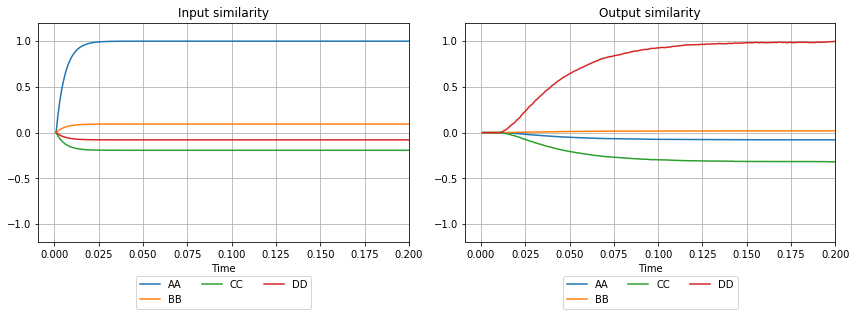

In [23]:
input_data = sim.data[input_probe]
output_data = sim.data[output_probe]
plot_similarities(input_data, output_data, vocab)